<a href="https://colab.research.google.com/github/Abhishek-Dhaka/Projects/blob/main/fitness_trackers_products_ecommerce_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd

In [4]:
#Loading Data using Read_csv
DF=pd.read_csv("/content/smartwatches.csv")

In [5]:
#Overview of DATA
DF.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [ ]:
#Shape of Data Frame
DF.shape

(450, 16)

Now, **A very important step** : copying data into an other varible becouse if by mistake we do a wrong Data manipulation or make a mistake in data cleaning , So our  orignal data is not affected .

In [ ]:
df = DF.copy()

In [ ]:
#View Data types of each column
df.dtypes

Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [ ]:
#cheaking Missing values in every column
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [ ]:
#Cheaking total Missing values
df.isnull().sum().sum()

862

Using **Fillna** method filling the Missing value by **mean** and **median** only **continuous** value

In [ ]:
df['Current Price'].fillna(df['Current Price'].mean(), inplace=True)
df['Original Price'].fillna(df['Original Price'].mean(), inplace=True)
df['Discount Percentage'].fillna(df['Discount Percentage'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Number OF Ratings'].fillna(df['Number OF Ratings'].median(), inplace=True)
df['Battery Life (Days)'].fillna(df['Battery Life (Days)'].mean(), inplace=True)

Using Fillna method filling the Missing value by Mode only Non-Continuous value

In [ ]:
df['Model Name'].fillna(df['Model Name'].mode()[0], inplace=True)
df['Dial Shape'].fillna(df['Dial Shape'].mode()[0], inplace=True)
df['Strap Color'].fillna(df['Strap Color'].mode()[0], inplace=True)
df['Strap Material'].fillna(df['Strap Material'].mode()[0], inplace=True)
df['Touchscreen'].fillna(df['Touchscreen'].mode()[0], inplace=True)
df['Bluetooth'].fillna(df['Bluetooth'].mode()[0], inplace=True)
df['Display Size'].fillna(df['Display Size'].mode()[0], inplace=True)
df['Weight'].fillna(df['Weight'].mode()[0], inplace=True)

In [ ]:
#No more missing values
df.isnull().sum()

Unnamed: 0             0
Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Model Name             0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
Weight                 0
dtype: int64

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df

Brand  Current Price  Original Price  Discount Percentage    Rating  \
0         noise        82990.0         89900.0             7.686318  4.000000   
1    fire-boltt         3799.0         16999.0            77.651627  4.300000   
2          boat         1999.0          7990.0            74.981227  3.800000   
3    fire-boltt         1799.0         19999.0            91.004550  4.300000   
4         noise         1599.0          4999.0            68.013603  4.100000   
..          ...            ...             ...                  ...       ...   
445  fire-boltt         5999.0          8999.0            33.337037  2.500000   
446  fire-boltt         3700.0          9999.0            62.996300  4.031306   
447  fire-boltt         5999.0          8999.0            33.337037  2.500000   
448  fire-boltt         3200.0          7999.0            59.994999  4.031306   
449  fire-boltt         3000.0          7999.0            62.495312  4.031306   

     Number OF Ratings                              Model Name Dial Shape  \
0                 65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk     Circle   
1              20788.0                                  BSW046     Circle   
2              21724.0                               Wave Call     Circle   
3              13244.0                                  BSW053     Circle   
4              13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk     Circle   
..                 ...                                     ...        ...   
445              996.0                                  bsw003     Circle   
446              996.0                               beast pro     Square   
447              996.0                                  bsw003     Circle   
448              996.0                                  call 2     Square   
449              996.0                                  call 2     Square   

    Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         Black        Silicon         Yes                  8.0       Yes   
1         Black        Silicon         Yes                  3.5       Yes   
2         Black        Silicon         Yes                  8.0       Yes   
3         Black        Silicon         Yes                  3.5       Yes   
4         Black          Other         Yes                  8.0       Yes   
..          ...            ...         ...                  ...       ...   
445        Grey        Silicon         Yes                 22.0       Yes   
446       Black        Silicon         Yes                  8.0       Yes   
447        Gold        Silicon         Yes                 22.0       Yes   
448        Blue        Silicon         Yes                 22.0       Yes   
449       Black        Silicon         Yes                 22.0       Yes   

    Display Size     Weight  
0     1.7 inches  35 - 50 g  
1     1.8 inches  50 - 75 g  
2     1.7 inches  35 - 50 g  
3     1.8 inches      75g +  
4     1.7 inches  35 - 50 g  
..           ...        ...  
445   1.3 inches  20 - 35 g  
446   0.1 inches  20 - 35 g  
447   1.3 inches  20 - 35 g  
448   0.1 inches  20 - 35 g  
449   0.1 inches  20 - 35 g  

[450 rows x 15 columns]

In [ ]:
#Removing "inches" from Display Size column so me change it into Continuous values
df['Display Size'] = df['Display Size'].map(lambda x: x.lstrip('+-').rstrip('inches'))
df['Display Size']=df['Display Size'].astype(float)
df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk     Circle   
1            20788.0                                  BSW046     Circle   
2            21724.0                               Wave Call     Circle   
3            13244.0                                  BSW053     Circle   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk     Circle   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0       Black        Silicon         Yes                  8.0       Yes   
1       Black        Silicon         Yes                  3.5       Yes   
2       Black        Silicon         Yes                  8.0       Yes   
3       Black        Silicon         Yes                  3.5       Yes   
4       Black          Other         Yes                  8.0       Yes   

   Display Size     Weight  
0           1.7  35 - 50 g  
1           1.8  50 - 75 g  
2           1.7  35 - 50 g  
3           1.8      75g +  
4           1.7  35 - 50 g

In [ ]:
df.dtypes

Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size           float64
Weight                  object
dtype: object

In [ ]:
#Taking a Statastical View of Data Frame (Only Continuous)
df.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     450.000000      450.000000           450.000000  450.000000   
mean    12747.554545    14598.204244            48.236894    4.031306   
std     17561.772190    14138.392928            22.063017    0.546857   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2199.000000     5999.000000            38.494827    3.900000   
50%      3999.000000     9999.000000            48.236894    4.100000   
75%     16999.000000    14598.204244            64.560760    4.300000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  Display Size  
count         450.000000           450.000000    450.000000  
mean        10205.115556            14.077392      2.139778  
std         37844.309730             7.438372      4.233885  
min             1.000000             0.750000      0.000000  
25%           100.000000             8.000000      1.300000  
50%           996.000000            14.077392      1.600000  
75%          5228.000000            22.000000      1.800000  
max        619130.000000            22.000000     45.000000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.value_counts( df['Rating'] >= 4.0 )

Rating
True     302
False    148
Name: count, dtype: int64

Now breaking the data into two cat  **1. Rating > 4 and 2. Rating < 4**
This will help better understanding Data  using Visvalization .

**Question : What is the difference between the smartwatches of Rating < 4 and Rating > 4 ?**

In [ ]:
df_R45=df[(df['Rating']>=4.0) & (df['Rating']<=5.0 )]
df_R45

Brand  Current Price  Original Price  Discount Percentage    Rating  \
0         noise        82990.0         89900.0             7.686318  4.000000   
1    fire-boltt         3799.0         16999.0            77.651627  4.300000   
3    fire-boltt         1799.0         19999.0            91.004550  4.300000   
4         noise         1599.0          4999.0            68.013603  4.100000   
5         noise         1499.0          3999.0            62.515629  4.000000   
..          ...            ...             ...                  ...       ...   
423  fire-boltt         3499.0          9999.0            65.006501  4.800000   
426  fire-boltt         3599.0          5999.0            40.006668  5.000000   
446  fire-boltt         3700.0          9999.0            62.996300  4.031306   
448  fire-boltt         3200.0          7999.0            59.994999  4.031306   
449  fire-boltt         3000.0          7999.0            62.495312  4.031306   

     Number OF Ratings                              Model Name Dial Shape  \
0                 65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk     Circle   
1              20788.0                                  BSW046     Circle   
3              13244.0                                  BSW053     Circle   
4              13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk     Circle   
5              32704.0                                  NSW-05     Circle   
..                 ...                                     ...        ...   
423                4.0                               beast pro     Square   
426                3.0                                  bsw001  Rectangle   
446              996.0                               beast pro     Square   
448              996.0                                  call 2     Square   
449              996.0                                  call 2     Square   

    Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         Black        Silicon         Yes                  8.0       Yes   
1         Black        Silicon         Yes                  3.5       Yes   
3         Black        Silicon         Yes                  3.5       Yes   
4         Black          Other         Yes                  8.0       Yes   
5         Black          Other         Yes                  8.0       Yes   
..          ...            ...         ...                  ...       ...   
423      Silver         Rubber         Yes                  8.0       Yes   
426       Black        Silicon         Yes                 22.0       Yes   
446       Black        Silicon         Yes                  8.0       Yes   
448        Blue        Silicon         Yes                 22.0       Yes   
449       Black        Silicon         Yes                 22.0       Yes   

     Display Size     Weight  
0             1.7  35 - 50 g  
1             1.8  50 - 75 g  
3             1.8      75g +  
4             1.7  35 - 50 g  
5             1.7  35 - 50 g  
..            ...        ...  
423           0.1  20 - 35 g  
426           1.4  20 - 35 g  
446           0.1  20 - 35 g  
448           0.1  20 - 35 g  
449           0.1  20 - 35 g  

[302 rows x 15 columns]

In [ ]:
df_R1_4=df[((df['Rating'] >= 0.0 ) & (df['Rating'] < 4.0))]
df_R1_4.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
2    boat         1999.0          7990.0            74.981227     3.8   
12  noise         3799.0          7999.0            52.506563     3.8   
13  noise         3499.0          5999.0            41.673612     3.8   
19  noise         2499.0          5999.0            58.343057     3.5   
24   boat         1999.0          7990.0            74.981227     3.8   

    Number OF Ratings                            Model Name Dial Shape  \
2             21724.0                             Wave Call     Circle   
12              545.0  Wrb-sw-colorfitpro4alpha-std-blk_blk     Circle   
13              281.0              Wrb-sw-force-std-blk_blk     Circle   
19              227.0                             beast pro     Circle   
24            21724.0                             Wave Call     Circle   

   Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
2        Black        Silicon         Yes             8.000000       Yes   
12       Black        Silicon         Yes             8.000000       Yes   
13       Black        Silicon         Yes             8.000000       Yes   
19       Black        Silicon         Yes            14.077392       Yes   
24       Black        Silicon         Yes             8.000000       Yes   

    Display Size     Weight  
2            1.7  35 - 50 g  
12           1.7  35 - 50 g  
13           1.7  35 - 50 g  
19           1.3  35 - 50 g  
24           1.7  35 - 50 g

In [ ]:
df_R45.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     302.000000      302.000000           302.000000  302.000000   
mean    16179.572095    17108.686274            46.013885    4.305589   
std     20081.722853    16177.918385            23.508273    0.252915   
min      1199.000000     1669.000000           -79.688436    4.000000   
25%      2424.000000     5999.000000            32.698596    4.100000   
50%      8994.500000    14598.204244            48.236894    4.200000   
75%     20890.000000    19990.000000            64.012803    4.500000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  Display Size  
count         302.000000           302.000000    302.000000  
mean        14326.609272            13.657112      2.173510  
std         45558.891245             7.468400      4.440769  
min             1.000000             0.750000      0.000000  
25%           307.250000             8.000000      1.300000  
50%          1504.000000            14.077392      1.600000  
75%          8717.250000            22.000000      1.800000  
max        619130.000000            22.000000     45.000000

In [ ]:
df_R1_4.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     148.000000      148.000000           148.000000  148.000000   
mean     5744.383600     9475.463886            52.773032    3.471622   
std      6534.579569     5939.600163            18.009957    0.559037   
min      1299.000000     1899.000000           -20.001600    1.000000   
25%      2126.000000     5999.000000            43.671389    3.300000   
50%      3374.000000     7990.000000            54.785578    3.700000   
75%      4599.000000     9999.000000            66.677780    3.900000   
max     31999.000000    39990.000000            81.416309    3.900000   

       Number OF Ratings  Battery Life (Days)  Display Size  
count         148.000000           148.000000    148.000000  
mean         1795.040541            14.934991      2.070946  
std          4283.167991             7.327064      3.790235  
min             1.000000             0.750000      0.100000  
25%            22.000000             8.000000      1.300000  
50%           375.500000            17.500000      1.700000  
75%           996.000000            22.000000      1.800000  
max         23498.000000            22.000000     35.900000

After see Statastical data of both we can definitely see some differance

1. Average Battery Life of Rating( >4) 14 Days and Average Battery Life of Rating( <4) is 17.5 Days but Quartile 3 (75%) and Maximum Battery Life is same .  
2.  Major differance of 6000 Rupees for Average of Current Price and Orignal Price .  

<Axes: xlabel='Dial Shape', ylabel='count'>

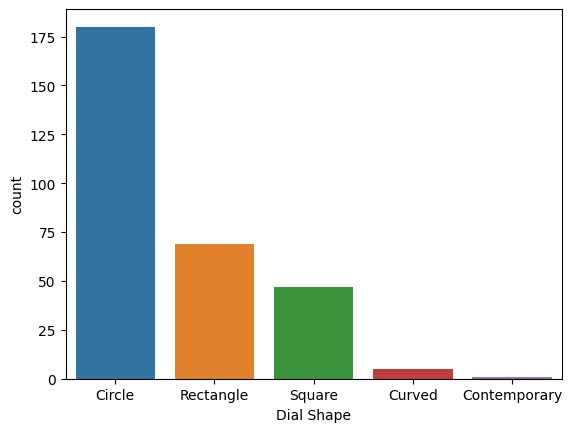

In [ ]:
sns.countplot(data=df_R45 , x='Dial Shape' )

<Axes: xlabel='Dial Shape', ylabel='count'>

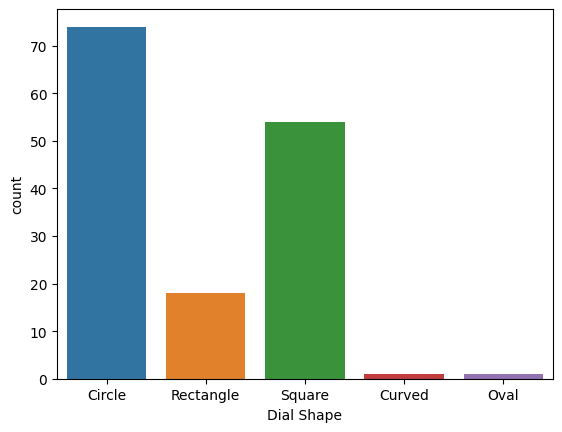

In [ ]:
sns.countplot(data=df_R1_4 , x='Dial Shape' )

<Axes: xlabel='count', ylabel='Strap Color'>

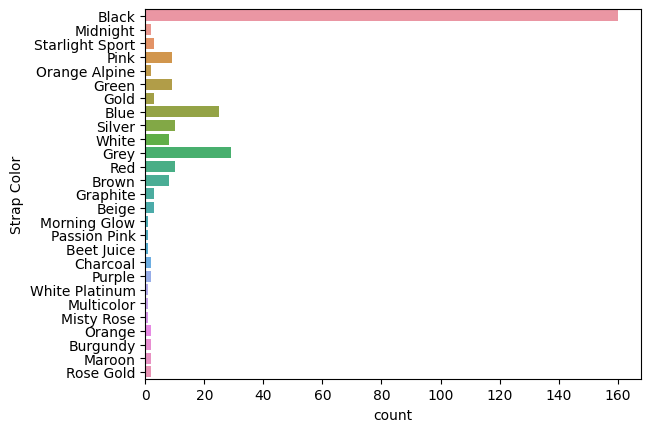

In [ ]:
sns.countplot(data=df_R45 , y='Strap Color')

<Axes: xlabel='count', ylabel='Strap Color'>

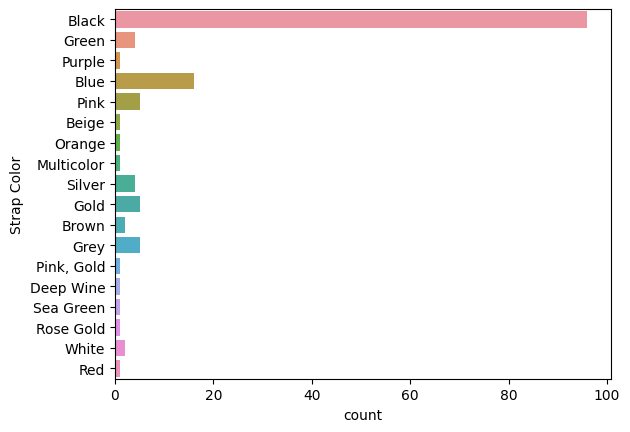

In [ ]:
sns.countplot(data=df_R1_4 , y='Strap Color')

sns.countplot(data=df_R45 , y='Strap Material')

<Axes: xlabel='count', ylabel='Strap Material'>

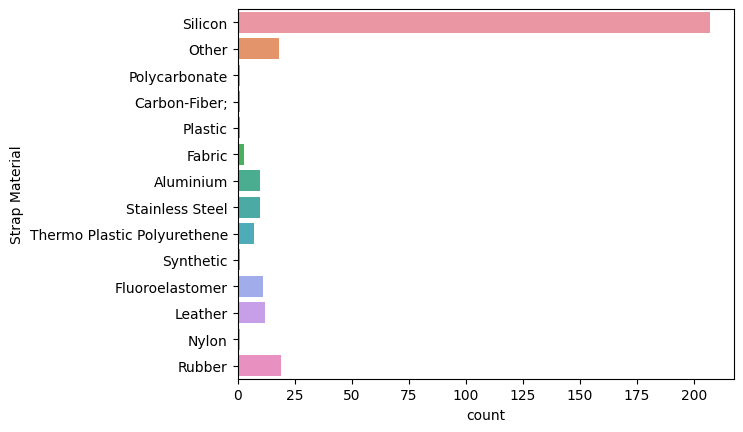

In [ ]:
sns.countplot(data=df_R45 , y='Strap Material')

<Axes: xlabel='count', ylabel='Strap Material'>

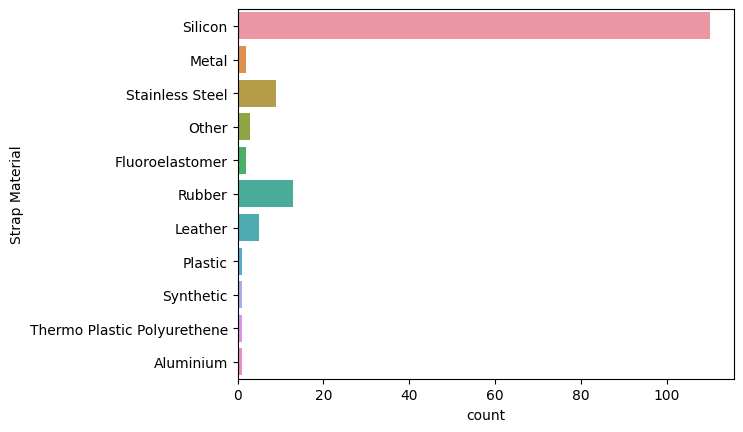

In [ ]:
sns.countplot(data=df_R1_4 , y='Strap Material')

<Axes: xlabel='count', ylabel='Brand'>

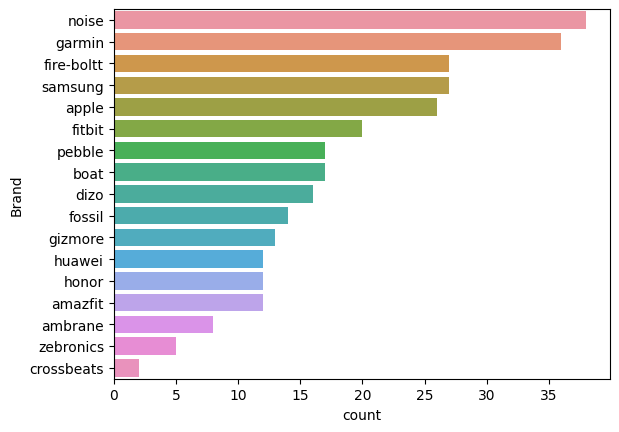

In [ ]:
sns.countplot(data=df_R45 , y='Brand' , order=df_R45['Brand'].value_counts().index)

<Axes: xlabel='count', ylabel='Brand'>

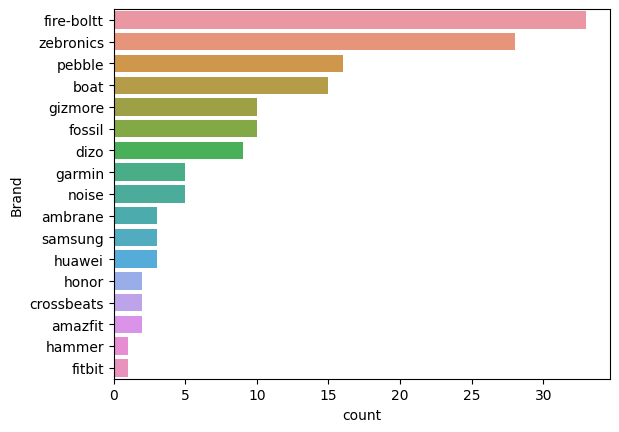

In [ ]:
sns.countplot(data=df_R1_4 , y='Brand' , order=df_R1_4['Brand'].value_counts().index)

<Axes: xlabel='Current Price', ylabel='Count'>

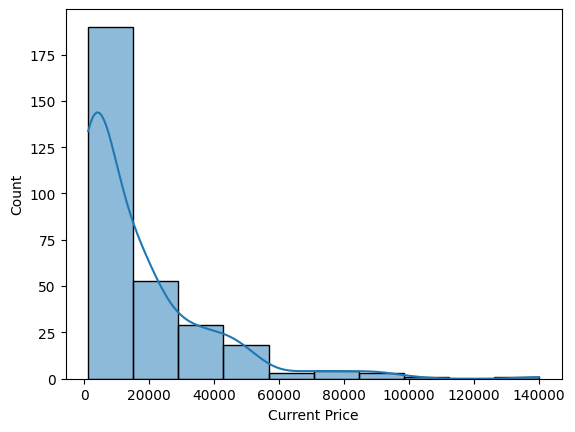

In [ ]:
sns.histplot(x='Current Price', data=df_R45, bins=10,kde=True)

<Axes: xlabel='Current Price', ylabel='Count'>

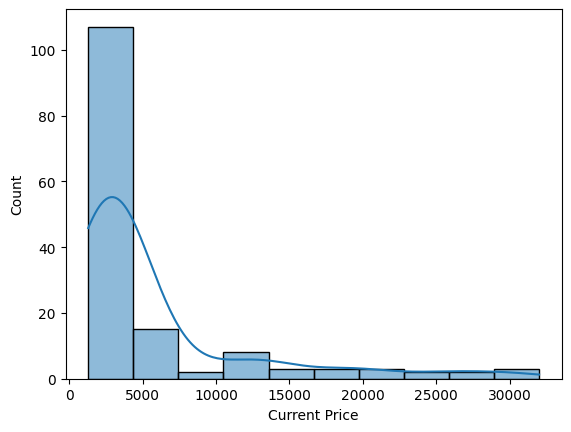

In [ ]:
sns.histplot(x='Current Price', data=df_R1_4, bins=10,kde=True)

<Axes: xlabel='Discount Percentage', ylabel='Brand'>

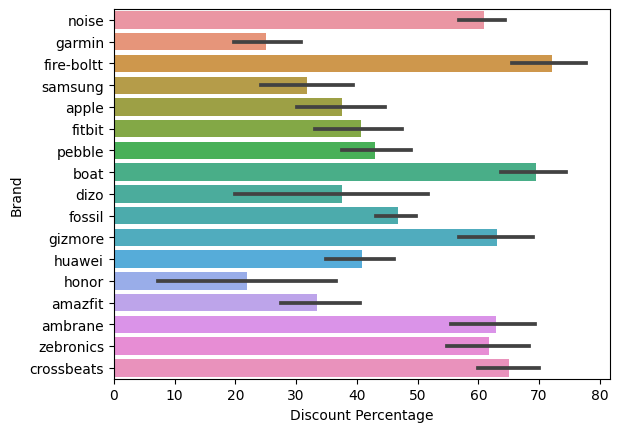

In [ ]:
sns.barplot(data=df_R45 , y='Brand' , x='Discount Percentage' , order=df_R45['Brand'].value_counts().index )

<Axes: xlabel='Discount Percentage', ylabel='Brand'>

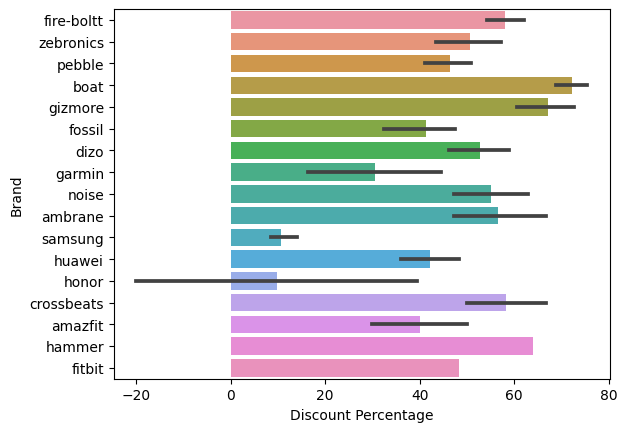

In [ ]:
sns.barplot(data=df_R1_4 , y='Brand' , x='Discount Percentage' , order=df_R1_4['Brand'].value_counts().index )

<Axes: xlabel='Rating', ylabel='Current Price'>

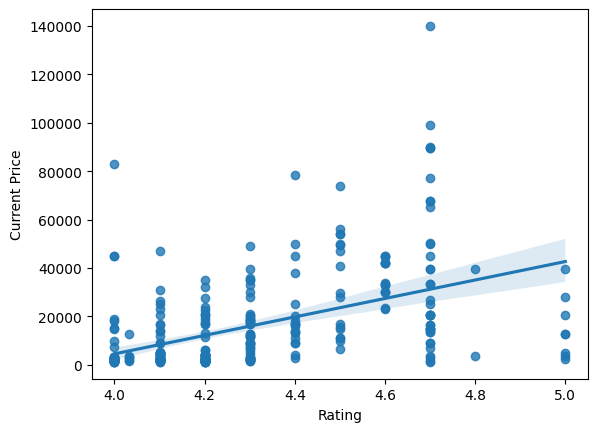

In [ ]:
sns.regplot(data=df_R45 , y='Current Price' , x='Rating')

<Axes: xlabel='Rating', ylabel='Current Price'>

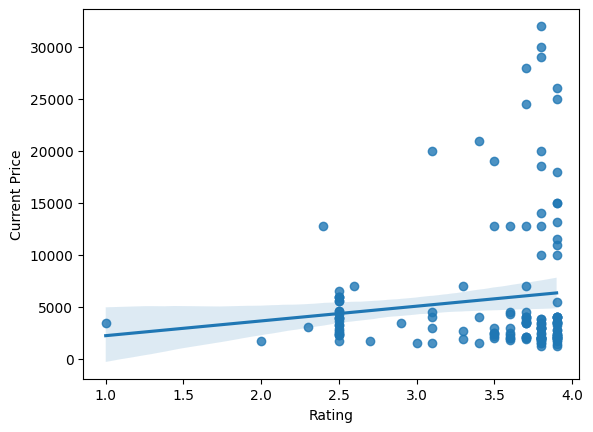

In [ ]:
sns.regplot(data=df_R1_4 , y='Current Price' , x='Rating')

<Axes: xlabel='Discount Percentage'>

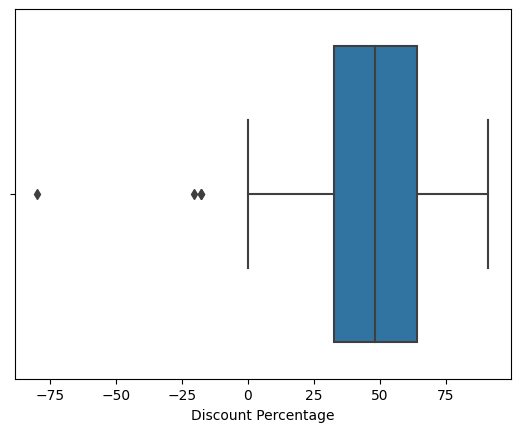

In [ ]:
sns.boxplot(data=df_R45 , x='Discount Percentage'  )

<Axes: xlabel='Discount Percentage'>

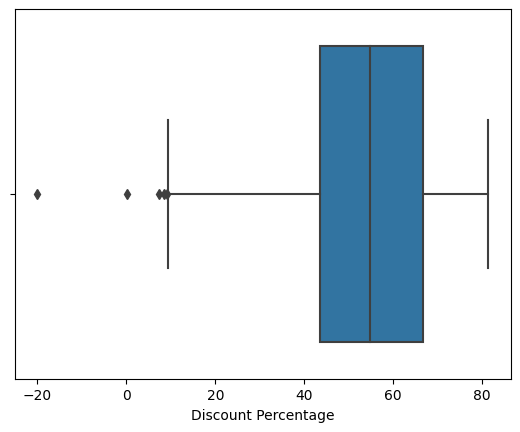

In [ ]:
sns.boxplot(data=df_R1_4 , x='Discount Percentage'  )

In [ ]:
df.groupby('Brand')['Rating'].mean().sort_values(ascending = False)

Brand
apple         4.553846
garmin        4.441463
fitbit        4.425300
huawei        4.313333
honor         4.235714
samsung       4.223333
amazfit       4.142857
crossbeats    4.100000
ambrane       4.081818
noise         4.069767
fossil        4.066667
boat          3.997853
pebble        3.954545
dizo          3.876000
gizmore       3.866579
zebronics     3.636364
hammer        3.600000
fire-boltt    3.503232
Name: Rating, dtype: float64

In [ ]:
df_D50=df[((df['Discount Percentage'] >= 50 ) & (df['Discount Percentage'] < 100))]
df_D50

Brand  Current Price  Original Price  Discount Percentage    Rating  \
1    fire-boltt         3799.0         16999.0            77.651627  4.300000   
2          boat         1999.0          7990.0            74.981227  3.800000   
3    fire-boltt         1799.0         19999.0            91.004550  4.300000   
4         noise         1599.0          4999.0            68.013603  4.100000   
5         noise         1499.0          3999.0            62.515629  4.000000   
..          ...            ...             ...                  ...       ...   
442  fire-boltt         3999.0          9999.0            60.006001  3.700000   
444  fire-boltt         6999.0         15999.0            56.253516  2.600000   
446  fire-boltt         3700.0          9999.0            62.996300  4.031306   
448  fire-boltt         3200.0          7999.0            59.994999  4.031306   
449  fire-boltt         3000.0          7999.0            62.495312  4.031306   

     Number OF Ratings                              Model Name Dial Shape  \
1              20788.0                                  BSW046     Circle   
2              21724.0                               Wave Call     Circle   
3              13244.0                                  BSW053     Circle   
4              13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk     Circle   
5              32704.0                                  NSW-05     Circle   
..                 ...                                     ...        ...   
442                6.0                                    ring     Square   
444              996.0                                  bsw020     Circle   
446              996.0                               beast pro     Square   
448              996.0                                  call 2     Square   
449              996.0                                  call 2     Square   

    Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
1         Black        Silicon         Yes                  3.5       Yes   
2         Black        Silicon         Yes                  8.0       Yes   
3         Black        Silicon         Yes                  3.5       Yes   
4         Black          Other         Yes                  8.0       Yes   
5         Black          Other         Yes                  8.0       Yes   
..          ...            ...         ...                  ...       ...   
442       White         Rubber         Yes                 22.0       Yes   
444       Brown        Silicon         Yes                  8.0       Yes   
446       Black        Silicon         Yes                  8.0       Yes   
448        Blue        Silicon         Yes                 22.0       Yes   
449       Black        Silicon         Yes                 22.0       Yes   

     Display Size     Weight  
1             1.8  50 - 75 g  
2             1.7  35 - 50 g  
3             1.8      75g +  
4             1.7  35 - 50 g  
5             1.7  35 - 50 g  
..            ...        ...  
442           1.7  20 - 35 g  
444           1.4  20 - 35 g  
446           0.1  20 - 35 g  
448           0.1  20 - 35 g  
449           0.1  20 - 35 g  

[215 rows x 15 columns]

In [ ]:
df_D50.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     215.000000      215.000000           215.000000  215.000000   
mean     3078.260465     8745.748837            65.432669    3.883519   
std      2742.985289     5809.951506             9.191784    0.533494   
min      1199.000000     2999.000000            50.003846    1.000000   
25%      1799.000000     5990.000000            59.997500    3.800000   
50%      2199.000000     6999.000000            65.016254    4.000000   
75%      3299.000000     9999.000000            71.673852    4.200000   
max     18410.000000    37999.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  Display Size  
count         215.000000           215.000000    215.000000  
mean        18275.479070            13.550643      1.855349  
std         53011.174817             7.523448      1.988414  
min             1.000000             0.750000      0.100000  
25%           553.000000             8.000000      1.400000  
50%          2138.000000            12.500000      1.700000  
75%         14722.000000            22.000000      1.800000  
max        619130.000000            22.000000     20.000000

<Axes: xlabel='count', ylabel='Brand'>

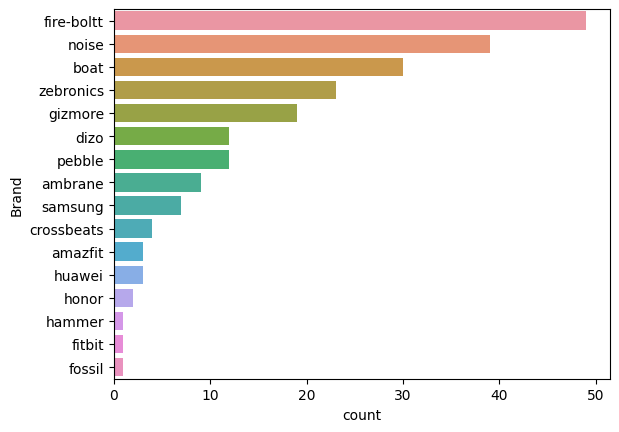

In [ ]:
sns.countplot(data= df_D50 , y='Brand' , order=df_D50['Brand'].value_counts().index)

Form above **Statistical Analysis and  Visualization** , We have some results

1. *Top Brands* ( based on Rating ) : **Apple ,Garmin , Fitbit , Huawei , Honor ,Samsung** .

2. *Buttom Brands* ( based on Rating ) : **Fire-boltt ,Hammer , Zebronics , Gizmore , Dizo** .

3. *Top Brands* ( based on giving Discount ) : **Fire-bolt , Noise , Boat , Zebronics , Gizmore** .




/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


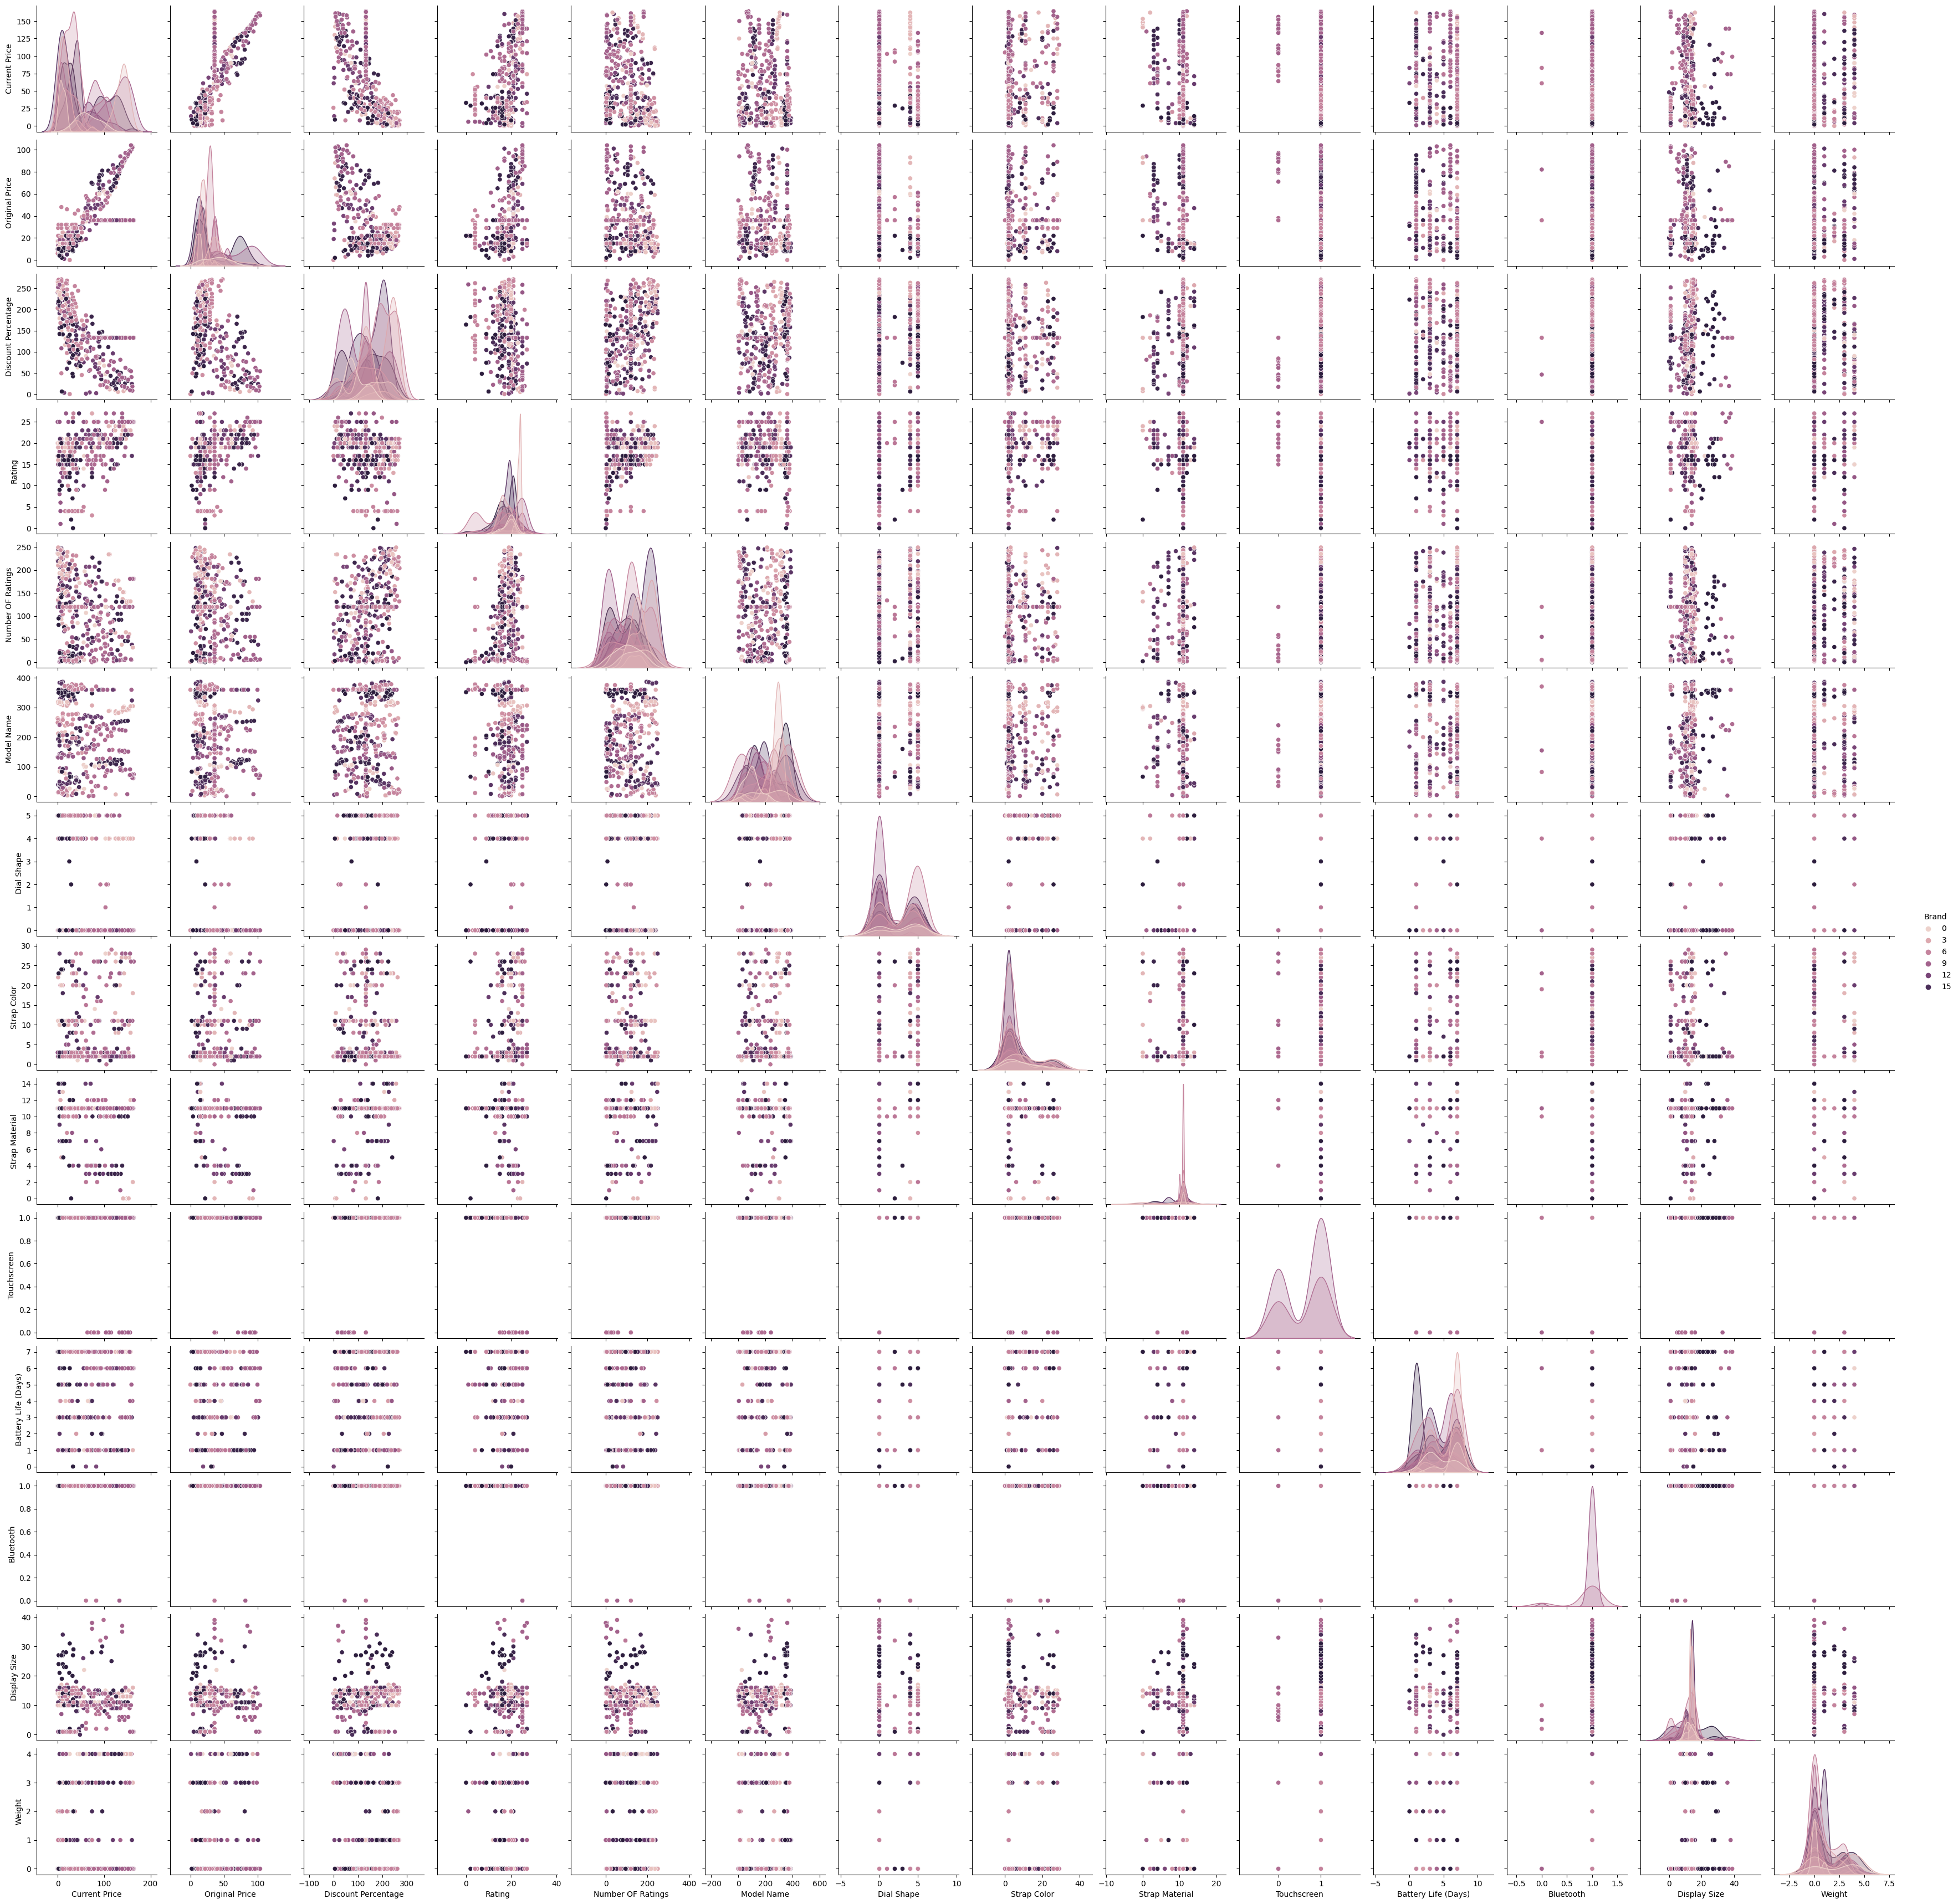

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_num = df.apply(LabelEncoder().fit_transform)
sns.pairplot(df_num, hue='Brand')

In [ ]:
# Data Normalization for good Corelation
df_num['Current Price']=(df_num['Current Price']-df_num['Current Price'].min()) / (df_num['Current Price'].max()-df_num['Current Price'].min())
df_num['Original Price']=(df_num['Original Price']-df_num['Original Price'].min()) / (df_num['Original Price'].max()-df_num['Original Price'].min())
df_num['Battery Life (Days)']=(df_num['Battery Life (Days)']-df_num['Battery Life (Days)'].min()) / (df_num['Battery Life (Days)'].max()-df_num['Battery Life (Days)'].min())
df_num['Display Size']=(df_num['Display Size']-df_num['Display Size'].min()) / (df_num['Display Size'].max()-df_num['Display Size'].min())
df_num['Discount Percentage']=(df_num['Discount Percentage']-df_num['Discount Percentage'].min()) / (df_num['Discount Percentage'].max()-df_num['Discount Percentage'].min())
df_num['Display Size']=(df_num['Rating']-df_num['Rating'].min()) / (df_num['Rating'].max()-df_num['Rating'].min())
df_num['Number OF Ratings']=(df_num['Number OF Ratings']-df_num['Number OF Ratings'].min()) / (df_num['Number OF Ratings'].max()-df_num['Number OF Ratings'].min())

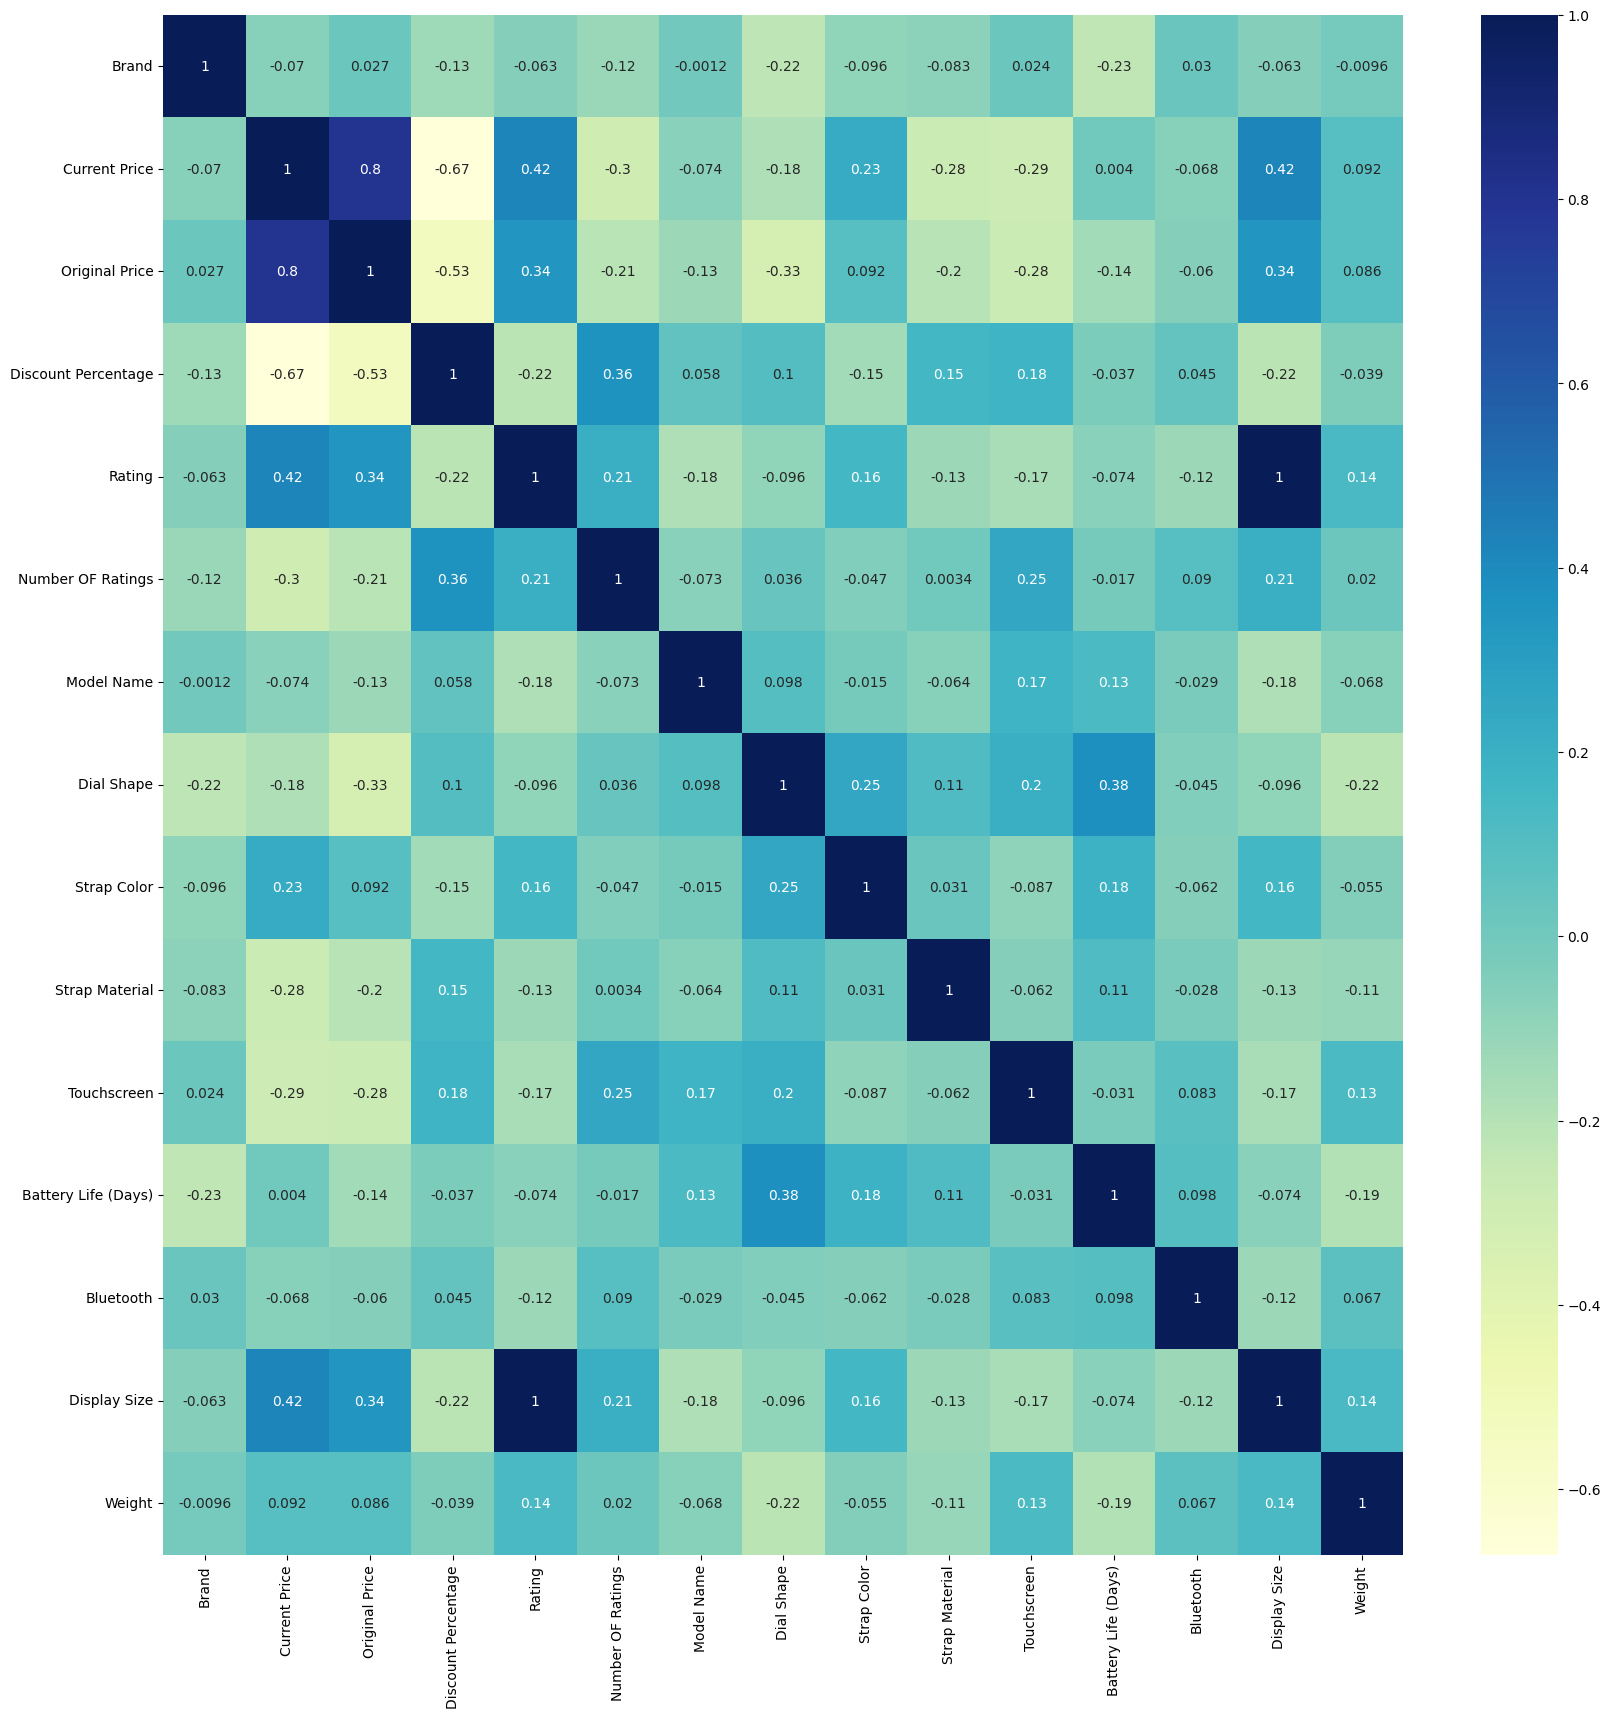

In [ ]:
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Good Correlation of Price and Rating**

From above *Correlation*,

1. Price and Display Size have really good corelation
2. Higher the Discount , Number of Ratings also Increase  